## Student Performance Indicator
Life cycle of Machine Learning Project

*  Understanding the Problem statement
*  Data collection
*  Data checks to perfrom
*  Exploraroly Data Analysis (EDA)
*  Data Pre-Processing 
*  Model Training
*  Choose the best model








### 1) Problem Statement


* The undertands how the student performance (Test Score)  is affected by is affected by other variables such as Gender, Ethnicity, Parental level of Education, Lunch and Test Preparation course

### 2) Data Colletion

* Data source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The data contains 8 columns and 1000 rows






### 2.1 ) Import Data and Required Packages
#### Import Numpy, Pandas, Matplotlab, searborn and Warning Libary

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

#### Show the Top 5 Rows

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


####Shape of the Dataset

In [4]:
df.shape

(1000, 8)

### 2.2) Data Information 


* Gender: sex of the students -> (Male/Female)
* Race/ Ethinicity : Ethinicity of the students -> (Group A,B,C,D,E)
* Parental level of education: Parents Final education -> ( bachelor's degree,some college, master degree, assocaite degree, high schoool)
* Lunch: Having lunch before test (standard or free/ reduced)
* Test preparation: complete or incomplete before test
* Math Score
* Reading score
* Writing score

### 3.) Data checks to perform
* Check the missing values
* Check duplicates
* Check data types
* Check the unique values of each column
* Check the stastics data set
* Check varous categories present in different categorical column

### 3.1) Check the Missing value

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values

### 3.3)Check data types

In [6]:
#check null and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4) Check the number of unique values of each column



In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5) Check the data statistics 

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight


* From the above description of the numerical data, all means are very close to each between 66 and 68.05
* All the std are close between 14.60 and 15.19
* While the minimum score for math score is 0, for mimimum is reading score is 17 and for writing score is 10





### 3.7) Exploring Data

In [9]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
print("Categories in 'Gender' variable: ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable: ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable: ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'Gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:  ['none' 'completed']


In [11]:
#Define numerical and categorical data
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
#print
print(f"We have {len(numeric_features)} numerical features: {numeric_features}")
print(f"We have {len(categorical_features)} categorical features: {categorical_features}")


We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [12]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.8) Adding columns for Total score and avarage

In [13]:
df["total score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df['avarage'] = df["total score"]/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,avarage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
#check the students with full marks
reading_full= df[df['reading_score'] == 100]['avarage'].count()
writing_full= df[df['writing_score'] == 100]['avarage'].count()
math_full= df[df['math_score'] == 100]['avarage'].count()

print(f"Students with full reading score marks: {reading_full} ")
print(f"Students with full writing score marks: {writing_full} ")
print(f"Students with full math score marks: {math_full} ")


Students with full reading score marks: 17 
Students with full writing score marks: 14 
Students with full math score marks: 7 


In [15]:
#check the students with full marks
reading_less_20= df[df['reading_score'] <= 20]['avarage'].count()
writing_less_20= df[df['writing_score'] <= 20]['avarage'].count()
math_less_20= df[df['math_score'] <= 20]['avarage'].count()

print(f"Students with less than 20 reading score marks: {reading_less_20} ")
print(f"Students with less than 20 writing score marks: {writing_less_20} ")
print(f"Students with less than 20 math score marks: {math_less_20} ")


Students with less than 20 reading score marks: 1 
Students with less than 20 writing score marks: 3 
Students with less than 20 math score marks: 4 


Insights


* From above, we get that many peromed well in reading and poorly in the maths score



### 4) Exploring Data
#### 4.1) Visualize avarage score distrubution to make some conclusion


*   Histogram
*   Kernel Distribution Kernel (KDE)



#### 4.1) Histogram & KDE

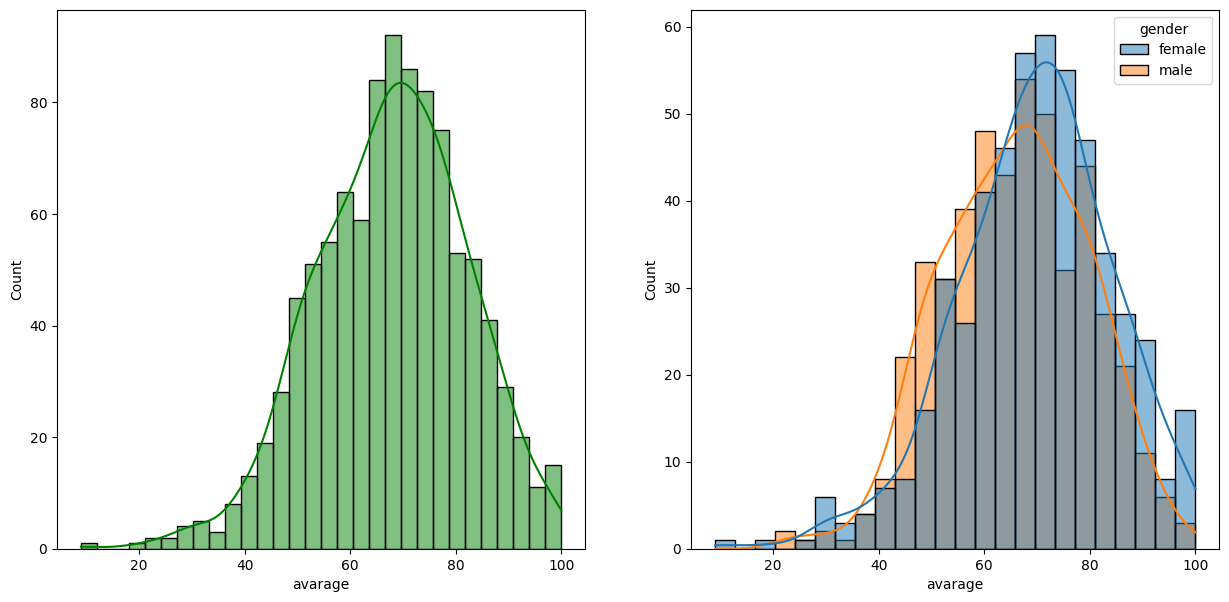

In [16]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df,x = 'avarage',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='avarage',kde=True,hue='gender')
plt.show()

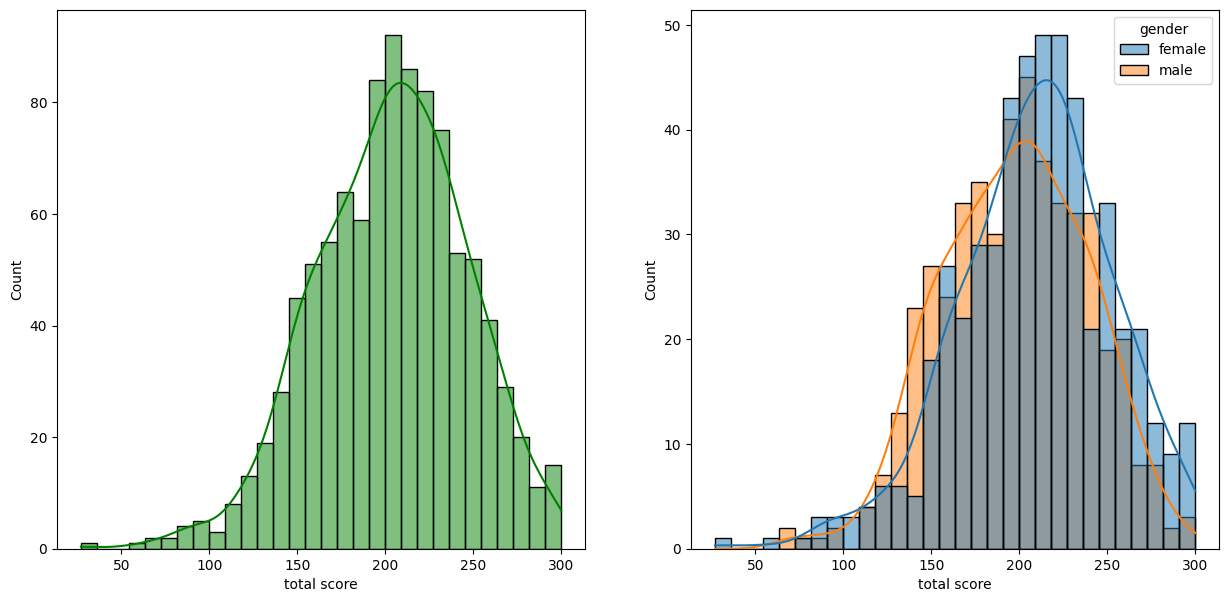

In [17]:
fig,axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data = df, x = 'total score',bins=30,kde=True,hue='gender')
plt.show()

Insight

* Female students tend to perfrom better than male students






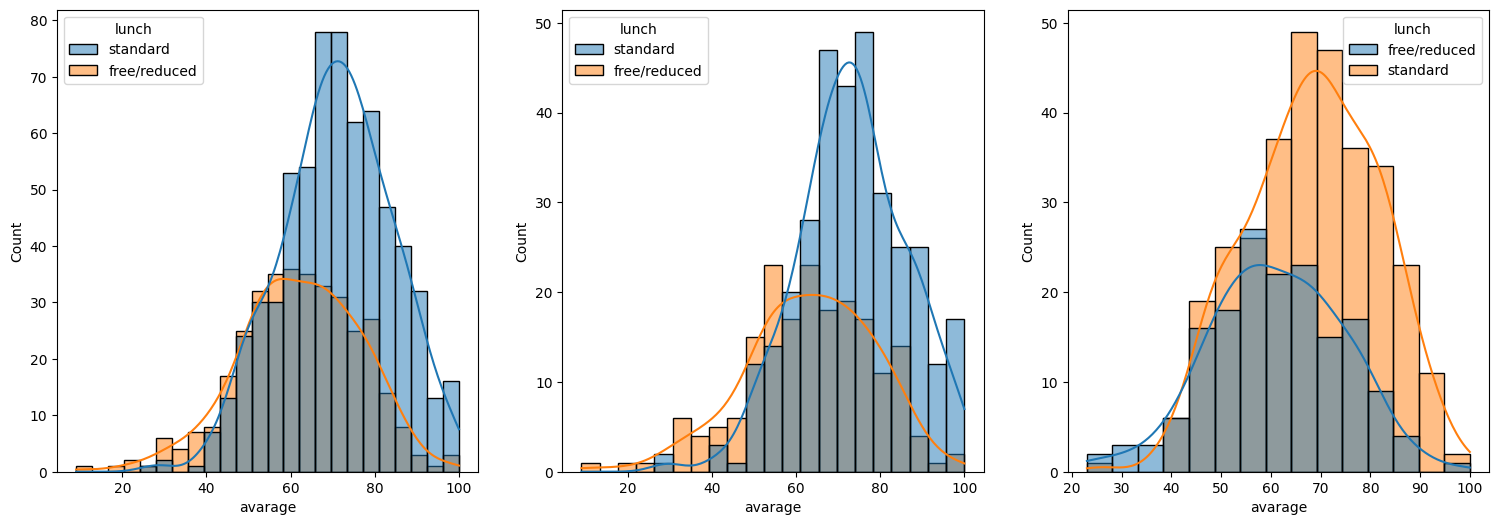

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df,x='avarage',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='avarage',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='avarage',kde=True,hue='lunch')
plt.show()



Insights


* Students perform well in the standard lunch
* Both male and female perfrom well on standard lunch



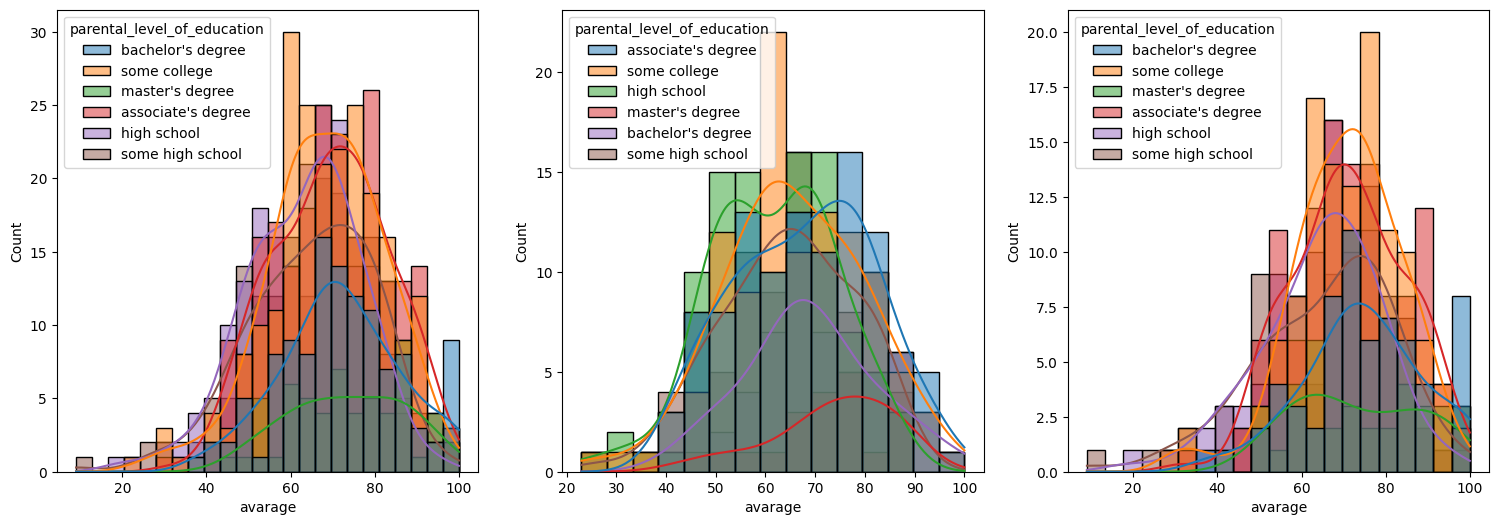

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='avarage',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='avarage',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='avarage',kde=True,hue='parental_level_of_education')
plt.show()


Insights


* In general, parents educations does not help the studenst to pass the exam
* 2nd plot shows that parents with masters degree will  higly help their students pass in exams
* 3rd plot shows the level of education of the parents does not help the female studenst


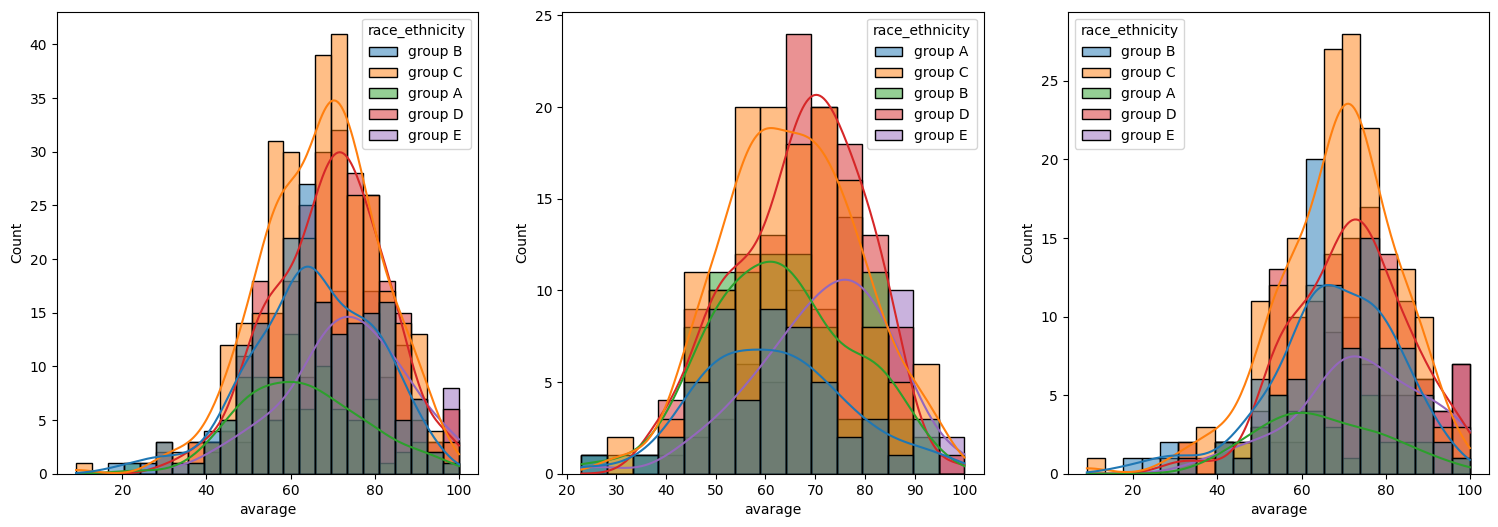

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='avarage',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='avarage',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='avarage',kde=True,hue='race_ethnicity')
plt.show()


Insights


* Students of group A and B tend to perform poorly in exams
* Students in group A and B tend to perform poorly irregardless of gender, female or male

### 4.2)The maximum score of all the 3 subjects

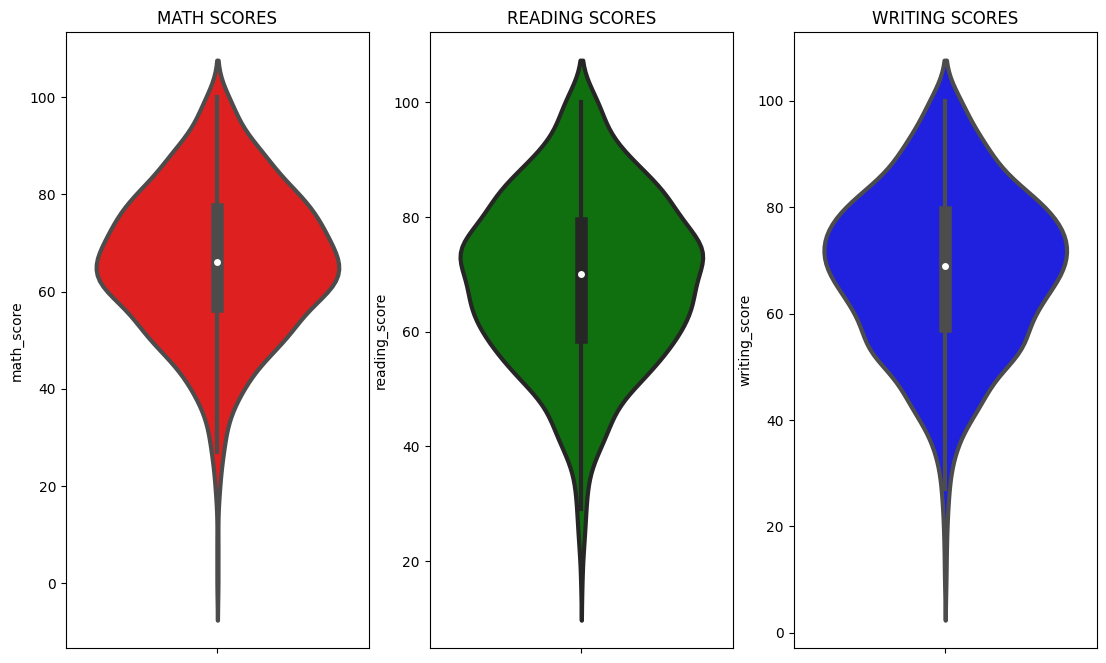

In [21]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title("MATH SCORES")
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title("READING SCORES")
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title("WRITING SCORES")
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

Insights


* From the 3 plots, students score 60-80 on the maths score and 50-80 on both writing and reading score



###4.3)Multivariate analysis using pieplot



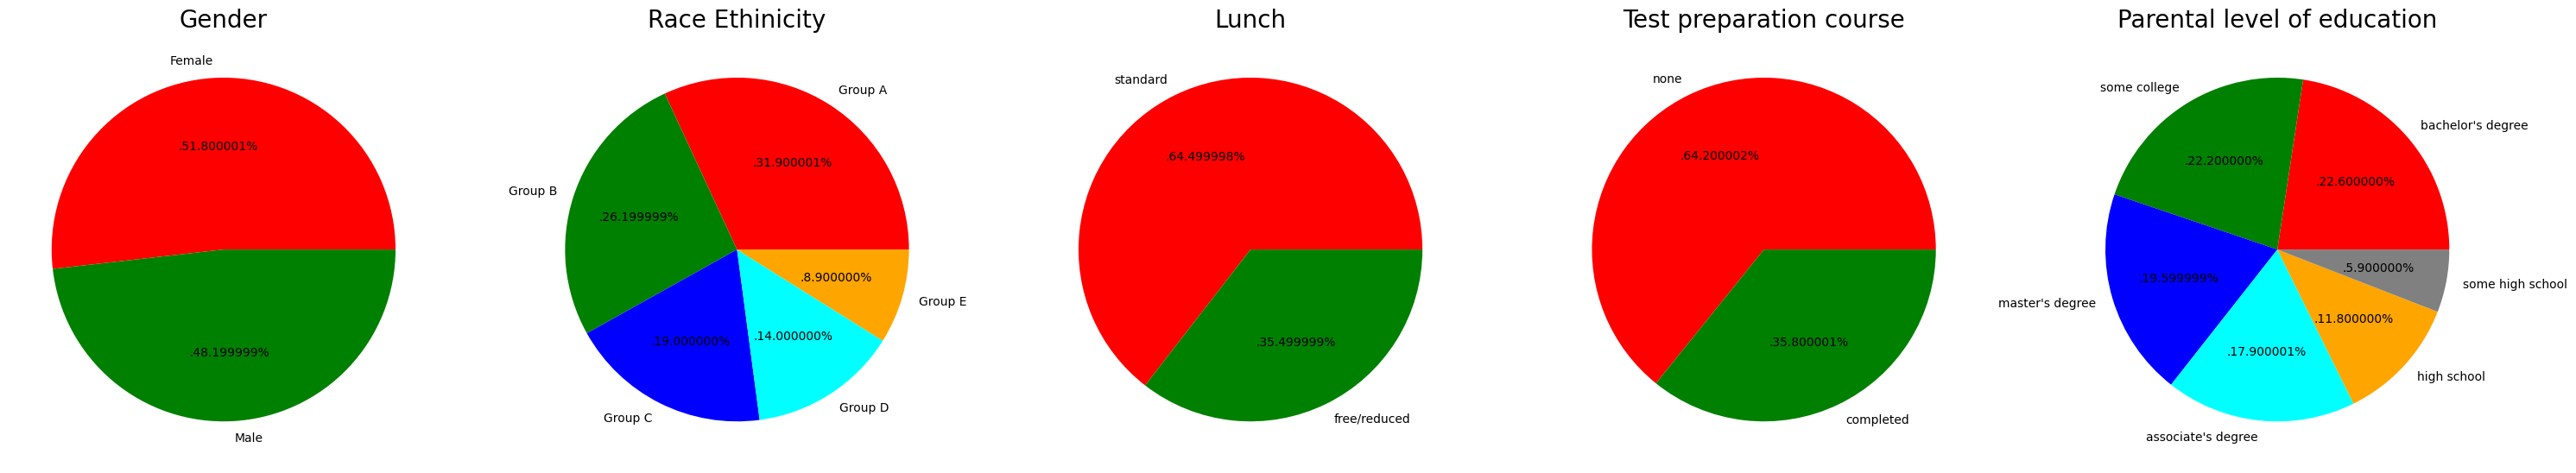

In [22]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'Group A','Group B','Group C','Group D','Group E'
color = ['red', 'green','blue','cyan','orange']

plt.pie(size,colors=color,labels = labels,autopct='.%2f%%')
plt.title('Race Ethinicity',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'standard','free/reduced'
color = ['red', 'green']

plt.pie(size,colors=color,labels = labels,autopct='.%2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['test_preparation_course'].value_counts()
labels = 'none','completed'
color = ['red', 'green']

plt.pie(size,colors=color,labels = labels,autopct='.%2f%%')
plt.title('Test preparation course',fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['parental_level_of_education'].value_counts()
labels = "bachelor's degree" ,'some college', "master's degree" ,"associate's degree",'high school' ,'some high school'
color = ['red', 'green','blue','cyan','orange','grey']

plt.pie(size,colors=color,labels = labels,autopct='.%2f%%')
plt.title('Parental level of education',fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

Insights


* Number of Male and Female students are almost eqaul
* Number of students are greatest at Group C
* Number of studenst who have standard lunch are greater
* Number of students who have not enrolled on test course ais greater
* Number of students with 'some college' is greater



### 4.4) Feature Wise Visualization
### 4.4.1)GENDER COLUMN


* How is the distribution of gender?
* Does the gender have impact on student performance?



### UNIVARIATE ANALYSIS (How is the distribution of gender)?

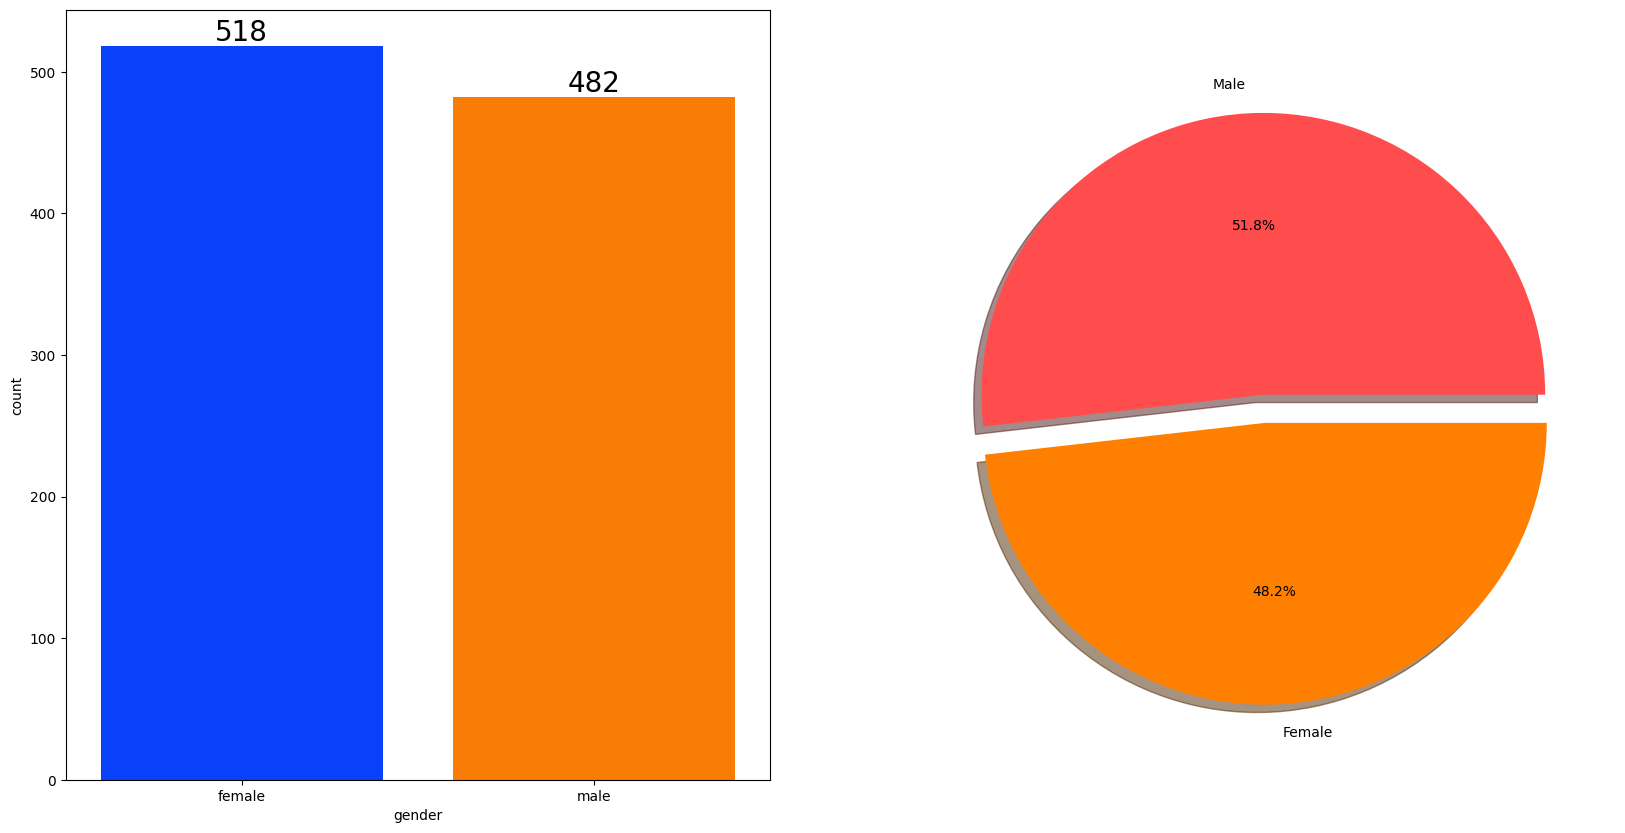

In [23]:
f, ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
  ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels= ['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights


* The gender has a balanced data of female 518 (48%) and male 482 (51%)



### BIVARATE ANALYSIS (Does the gender has any impact on student perfromance)

In [24]:
gender_group = df.groupby('gender').mean()
gender_group

TypeError: Could not convert group Bgroup Cgroup Bgroup Bgroup Bgroup Bgroup Bgroup Agroup Cgroup Bgroup Cgroup Bgroup Cgroup Cgroup Dgroup Dgroup Bgroup Egroup Dgroup Dgroup Dgroup Cgroup Bgroup Egroup Agroup Cgroup Dgroup Cgroup Cgroup Egroup Cgroup Cgroup Dgroup Cgroup Cgroup Dgroup Agroup Dgroup Egroup Bgroup Cgroup Cgroup Dgroup Agroup Dgroup Cgroup Bgroup Egroup Dgroup Dgroup Dgroup Cgroup Dgroup Bgroup Bgroup Dgroup Dgroup Egroup Bgroup Dgroup Dgroup Cgroup Cgroup Cgroup Bgroup Agroup Cgroup Cgroup Dgroup Cgroup Egroup Cgroup Dgroup Bgroup Cgroup Egroup Bgroup Egroup Egroup Cgroup Bgroup Bgroup Cgroup Dgroup Cgroup Cgroup Cgroup Bgroup Cgroup Bgroup Dgroup Cgroup Egroup Dgroup Cgroup Egroup Bgroup Cgroup Bgroup Bgroup Cgroup Dgroup Bgroup Bgroup Bgroup Cgroup Egroup Cgroup Dgroup Cgroup Bgroup Egroup Cgroup Cgroup Bgroup Dgroup Egroup Dgroup Bgroup Bgroup Dgroup Bgroup Egroup Cgroup Bgroup Cgroup Cgroup Cgroup Egroup Cgroup Dgroup Dgroup Egroup Dgroup Dgroup Cgroup Egroup Cgroup Dgroup Dgroup Bgroup Bgroup Egroup Cgroup Cgroup Bgroup Dgroup Bgroup Cgroup Cgroup Dgroup Dgroup Cgroup Egroup Cgroup Cgroup Cgroup Cgroup Bgroup Cgroup Bgroup Bgroup Dgroup Cgroup Bgroup Cgroup Cgroup Bgroup Cgroup Cgroup Cgroup Bgroup Cgroup Dgroup Bgroup Cgroup Dgroup Agroup Dgroup Cgroup Dgroup Dgroup Dgroup Dgroup Agroup Bgroup Egroup Agroup Egroup Egroup Cgroup Dgroup Dgroup Cgroup Bgroup Cgroup Cgroup Agroup Dgroup Cgroup Cgroup Bgroup Dgroup Dgroup Cgroup Cgroup Dgroup Dgroup Agroup Cgroup Cgroup Agroup Cgroup Dgroup Agroup Bgroup Cgroup Cgroup Egroup Cgroup Cgroup Dgroup Egroup Egroup Cgroup Cgroup Dgroup Agroup Cgroup Cgroup Cgroup Dgroup Bgroup Dgroup Dgroup Dgroup Bgroup Cgroup Agroup Cgroup Cgroup Cgroup Bgroup Cgroup Dgroup Bgroup Dgroup Bgroup Egroup Dgroup Bgroup Cgroup Bgroup Bgroup Cgroup Dgroup Egroup Dgroup Bgroup Cgroup Cgroup Dgroup Cgroup Cgroup Cgroup Egroup Cgroup Dgroup Cgroup Dgroup Dgroup Agroup Cgroup Bgroup Cgroup Cgroup Bgroup Dgroup Cgroup Dgroup Egroup Dgroup Cgroup Cgroup Egroup Bgroup Bgroup Dgroup Dgroup Egroup Dgroup Dgroup Dgroup Cgroup Agroup Cgroup Cgroup Agroup Egroup Cgroup Cgroup Dgroup Dgroup Dgroup Cgroup Egroup Cgroup Cgroup Egroup Bgroup Cgroup Cgroup Agroup Cgroup Egroup Cgroup Egroup Cgroup Bgroup Cgroup Bgroup Dgroup Dgroup Dgroup Bgroup Egroup Bgroup Dgroup Egroup Bgroup Dgroup Agroup Dgroup Agroup Bgroup Bgroup Dgroup Dgroup Cgroup Cgroup Cgroup Bgroup Cgroup Cgroup Cgroup Dgroup Bgroup Egroup Cgroup Dgroup Cgroup Egroup Cgroup Egroup Cgroup Dgroup Cgroup Dgroup Cgroup Agroup Dgroup Egroup Bgroup Dgroup Bgroup Dgroup Egroup Dgroup Bgroup Bgroup Cgroup Cgroup Cgroup Bgroup Egroup Dgroup Bgroup Cgroup Egroup Bgroup Agroup Cgroup Cgroup Cgroup Cgroup Egroup Dgroup Cgroup Dgroup Bgroup Bgroup Cgroup Dgroup Bgroup Cgroup Bgroup Bgroup Cgroup Agroup Dgroup Bgroup Bgroup Cgroup Bgroup Egroup Bgroup Cgroup Bgroup Dgroup Bgroup Egroup Egroup Cgroup Egroup Bgroup Cgroup Dgroup Egroup Cgroup Cgroup Agroup Bgroup Cgroup Agroup Dgroup Bgroup Cgroup Cgroup Cgroup Dgroup Agroup Cgroup Bgroup Cgroup Agroup Cgroup Dgroup Bgroup Dgroup Cgroup Agroup Egroup Bgroup Cgroup Cgroup Egroup Cgroup Cgroup Cgroup Dgroup Dgroup Egroup Bgroup Egroup Cgroup Egroup Dgroup Egroup Egroup Agroup Egroup Egroup Bgroup Dgroup Cgroup Agroup Dgroup Dgroup Dgroup Cgroup Agroup Cgroup Cgroup Bgroup Egroup Cgroup Cgroup Cgroup Bgroup Dgroup Cgroup Egroup Dgroup Bgroup Cgroup Dgroup Egroup Dgroup Egroup Cgroup Dgroup Dgroup Agroup Dgroup Egroup Cgroup Dgroup Egroup Bgroup Dgroup Agroup Dgroup Agroup Cgroup Cgroup Bgroup Agroup Cgroup Cgroup Agroup Dgroup Bgroup Dgroup Dgroup Egroup Cgroup Dgroup D to numeric

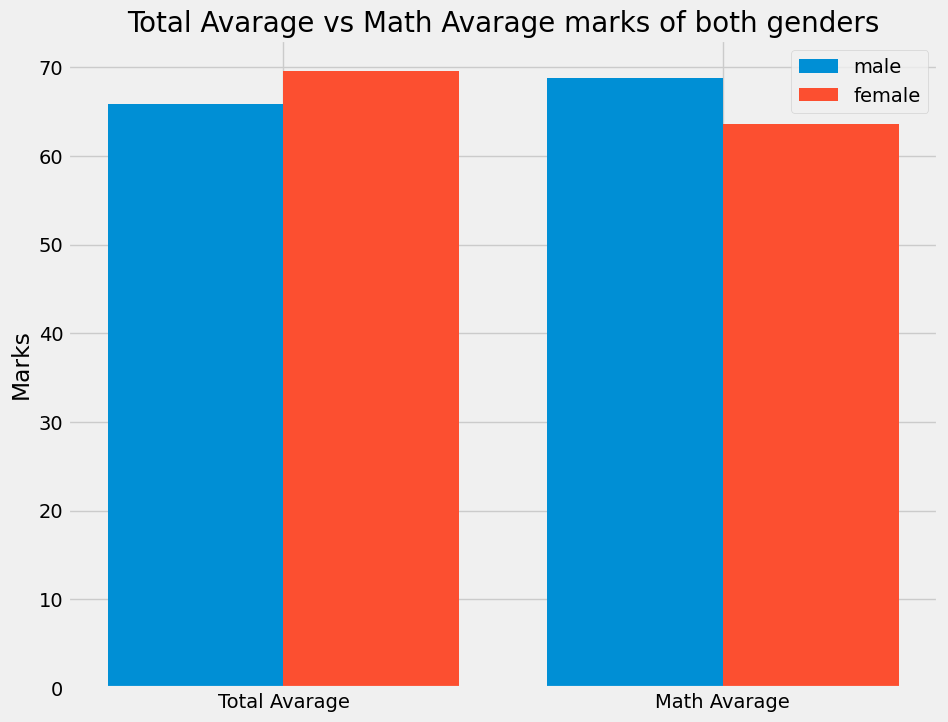

In [ ]:
plt.figure(figsize=(10,8))

X = ['Total Avarage','Math Avarage']

female_scores = [gender_group['avarage'][0],gender_group['math_score'][0]]
male_scores = [gender_group['avarage'][1],gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis-0.2,male_scores,0.4,label='male')
plt.bar(X_axis+0.2,female_scores,0.4,label='female')

plt.xticks(X_axis,X)
plt.ylabel('Marks')
plt.title('Total Avarage vs Math Avarage marks of both genders',fontsize=20)
plt.legend()
plt.show()

Insights


* On the avarage, the female have a better overall score than men
* Whereas men have scored best on Maths



### 4.4.2) RACE ETHINICITY COLUMN (How is the group wise distribution)


* How is the group wise distrinution?
* Does the race/ethinicity affect the student perforamance?



### UNIVARIATE ANALYSIS (How is the group wise distribution?)

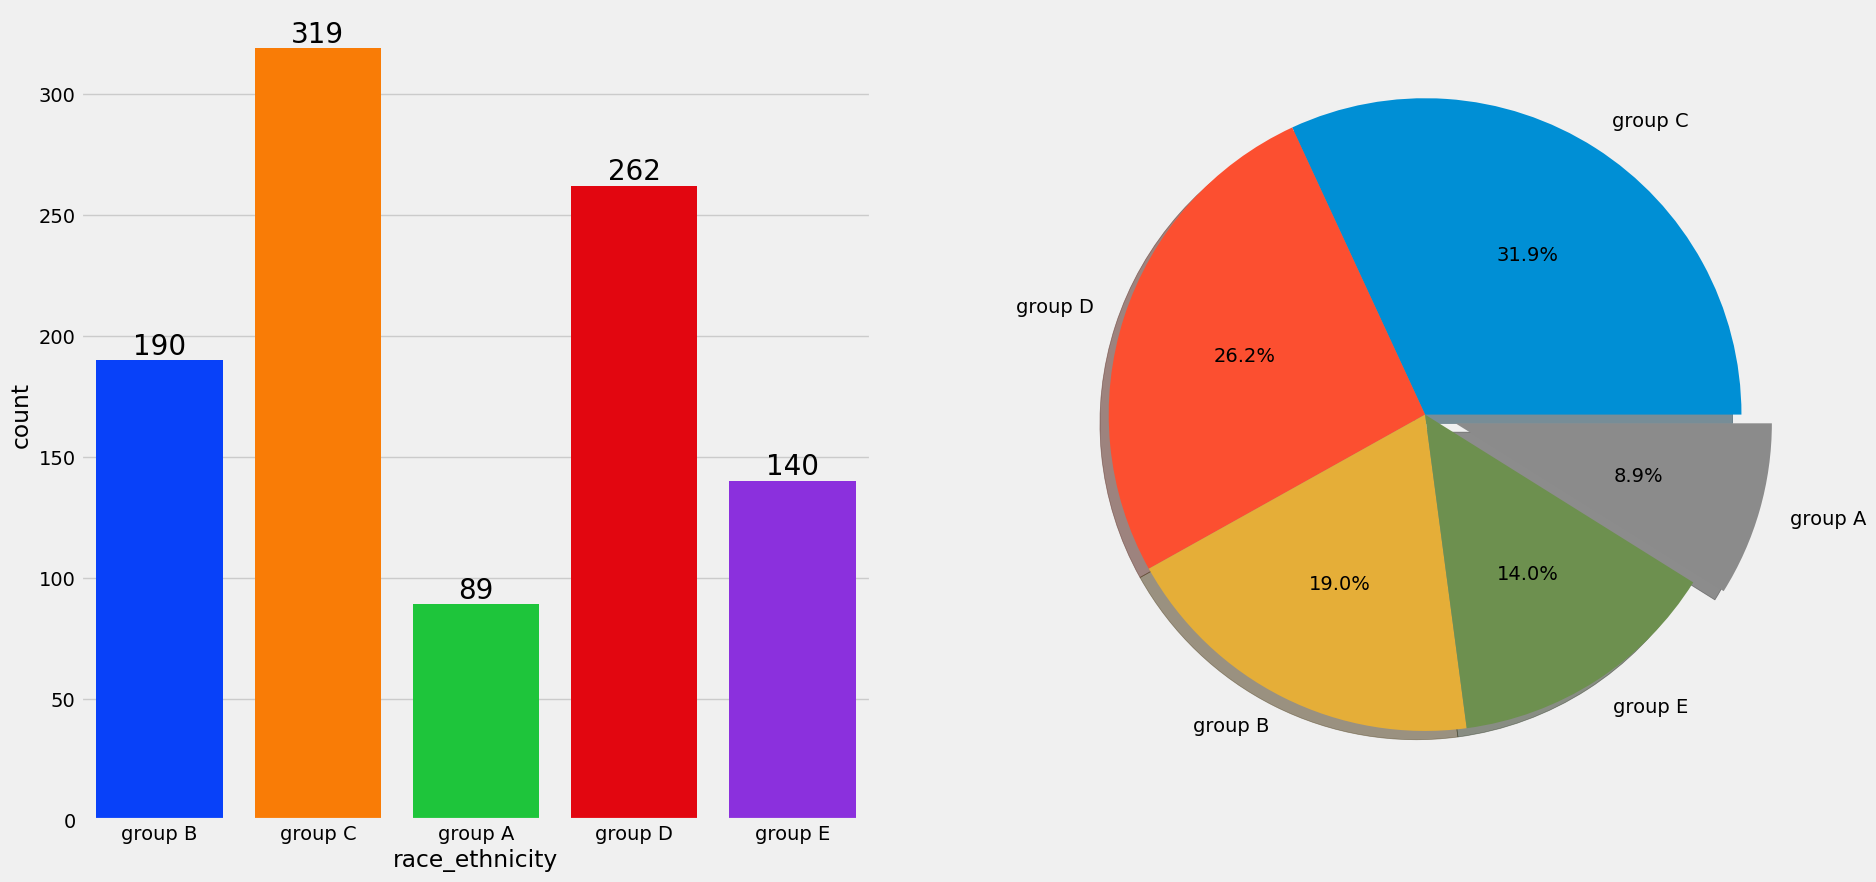

In [ ]:
f, ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
  ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['race_ethnicity'].value_counts(),labels= df['race_ethnicity'].value_counts().index,explode=[0,0,0,0,0.1],autopct='%1.1f%%',shadow=True)
plt.show()

Insights


* The most student belong to Group C
* The small group on the data is Group A



### BIVARIATE ANALYSIS (How does the race affect the student perfromance?)

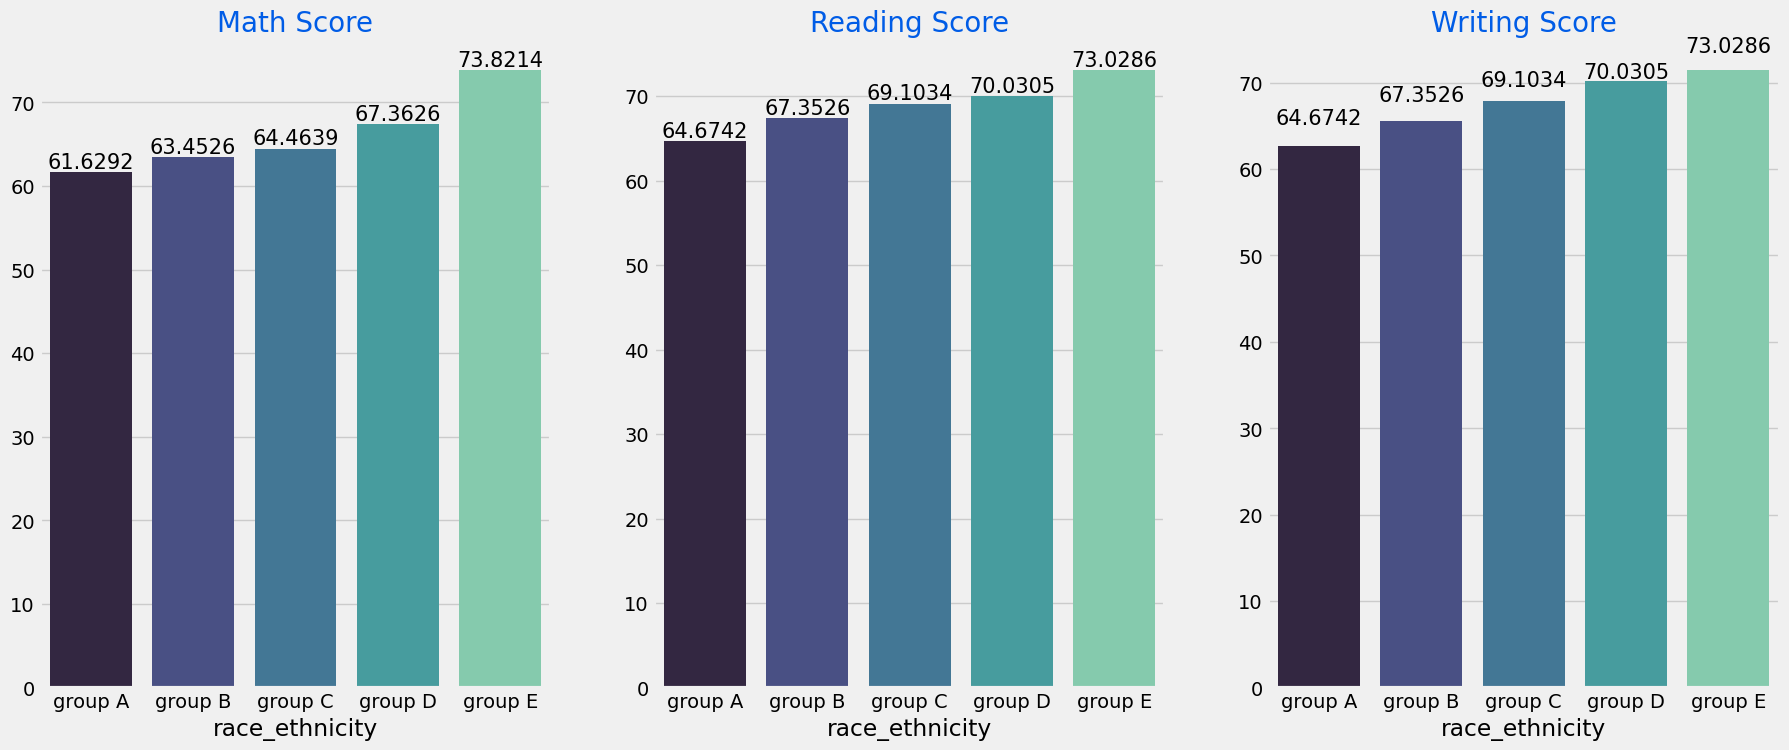

In [ ]:
group_data2 = df.groupby('race_ethnicity')
f, ax = plt.subplots(1,3,figsize=(20,8))


sns.barplot(x = group_data2['math_score'].mean().index,y=group_data2['math_score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Math Score',color='#005ce6',size=20)


for container in ax[0].containers:
  ax[0].bar_label(container,color='black',size=15)

sns.barplot(x = group_data2['reading_score'].mean().index,y=group_data2['reading_score'].mean().values,palette='mako',ax=ax[1])
ax[1].set_title('Reading Score',color='#005ce6',size=20)


for container in ax[1].containers:
  ax[1].bar_label(container,color='black',size=15)


sns.barplot(x = group_data2['writing_score'].mean().index,y=group_data2['writing_score'].mean().values,palette='mako',ax=ax[2])
ax[2].set_title('Writing Score',color='#005ce6',size=20)


for container in ax[1].containers:
  ax[2].bar_label(container,color='black',size=15)

Insights


* Group E has the students who scored the highest marks
* Group A has the number of students who have the lowest marks
* Stusents feo lower socialeconomic status scored lower marks


### 4.4.3)PARENTAL LEVEL OF EDUCATION COLUMN


* What is the level of education of the student?
* is the parental level of education has any impact on student performance?



### UNIVARIATE ANALYSIS (What is the parental education of the student?)

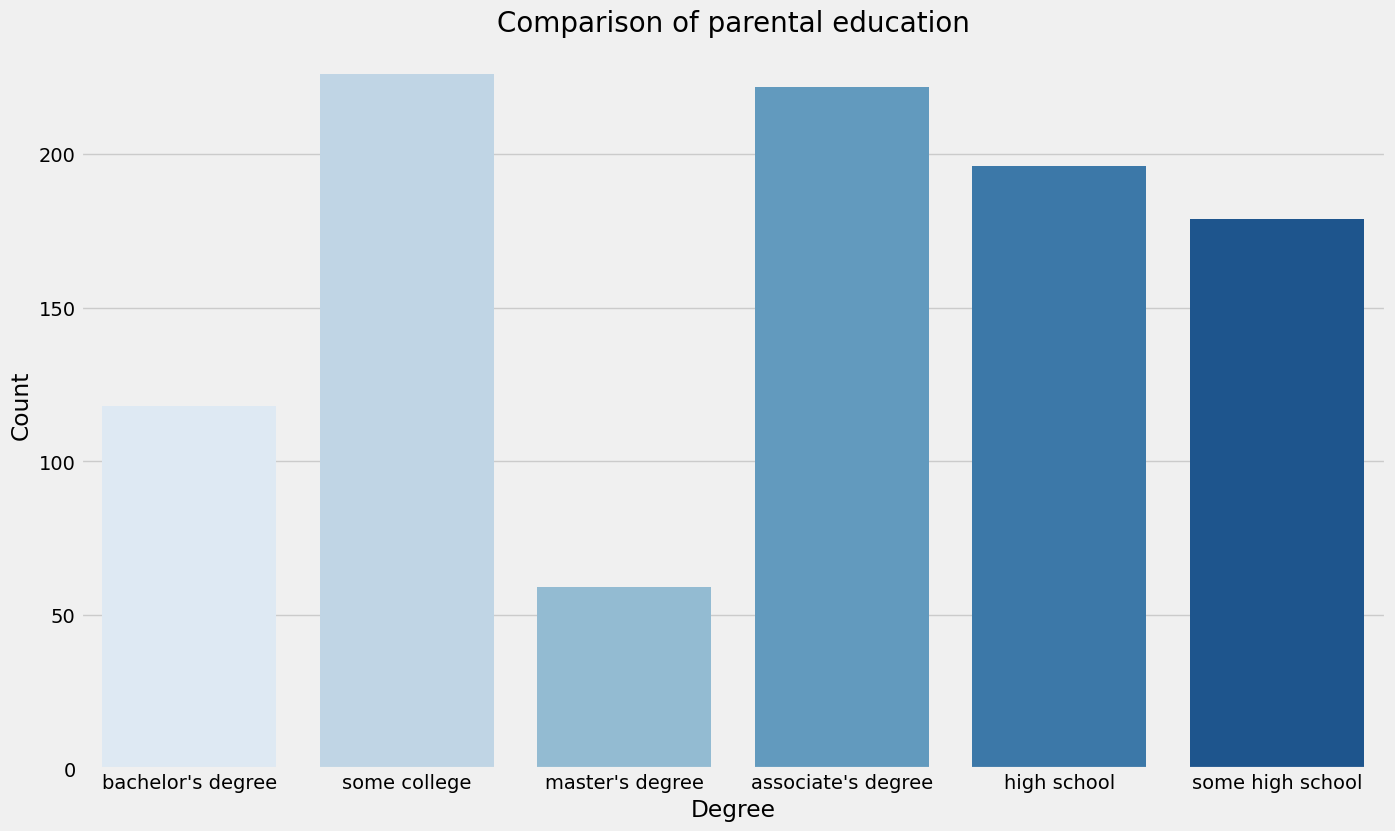

In [ ]:
# df['parental_level_of_education'] = pd.Categorical(df['parental_level_of_education'])
# df['parental_level_of_education'] = pd.Categorical(df['parental_level_of_education'])
# df['parental_level_of_education'] = df['parental_level_of_education'].astype(str)

plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental_level_of_education'],palette='Blues')
plt.title('Comparison of parental education',fontweight=30,fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

Insights


* The largest number come from the some college



### BIVARIATE ANALYSIS (Does the parent education affect the student performance?)

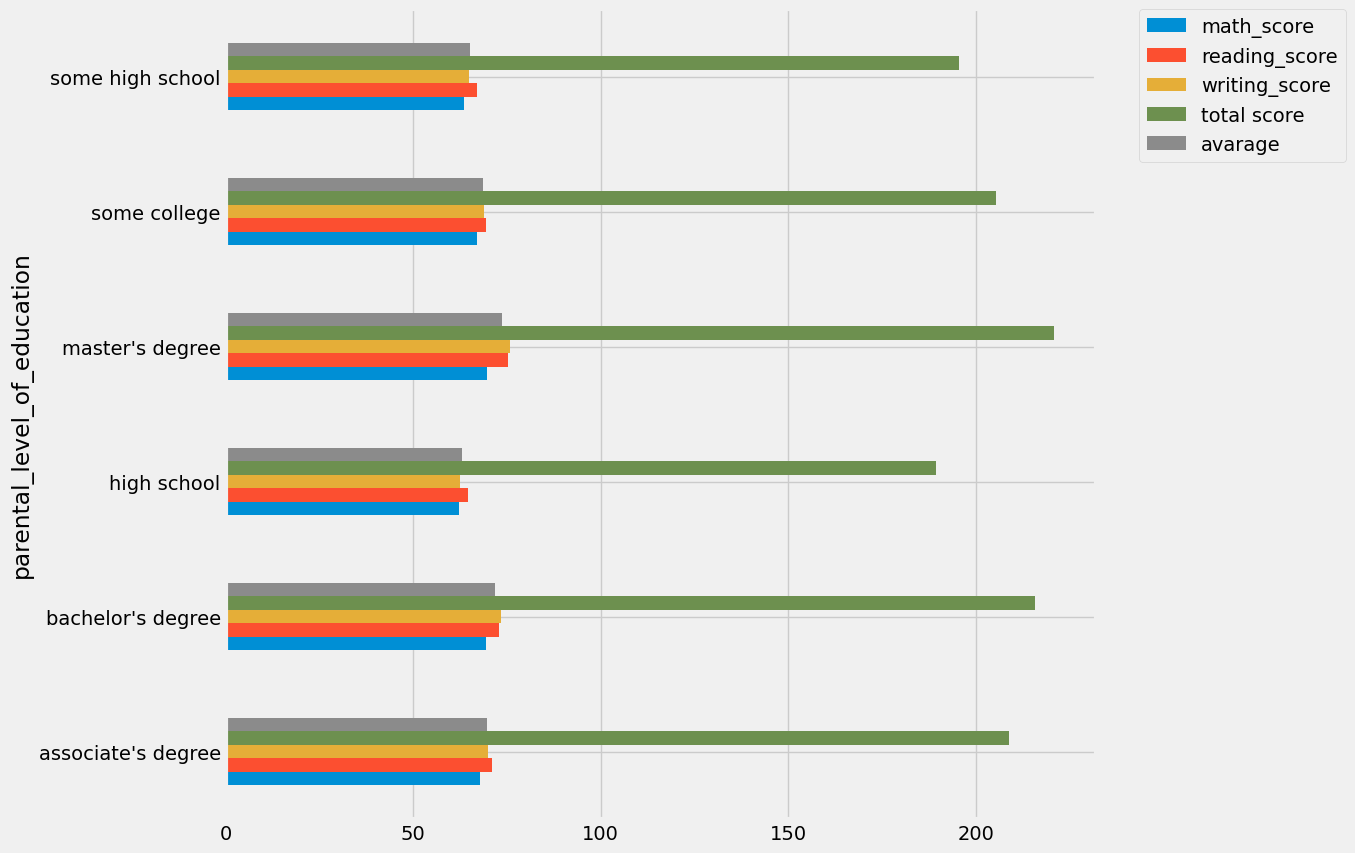

In [ ]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

Insights


* The parents with bacholor degree and master degree thier child seem to perfom better



### 4.4.4)LUNCH COLUMN


* Which type of lunch is most common among most students?
* Effect of lunch on the student performance?

### UNIVARIATE ANALYSIS(Which type of lunch is common among student?)



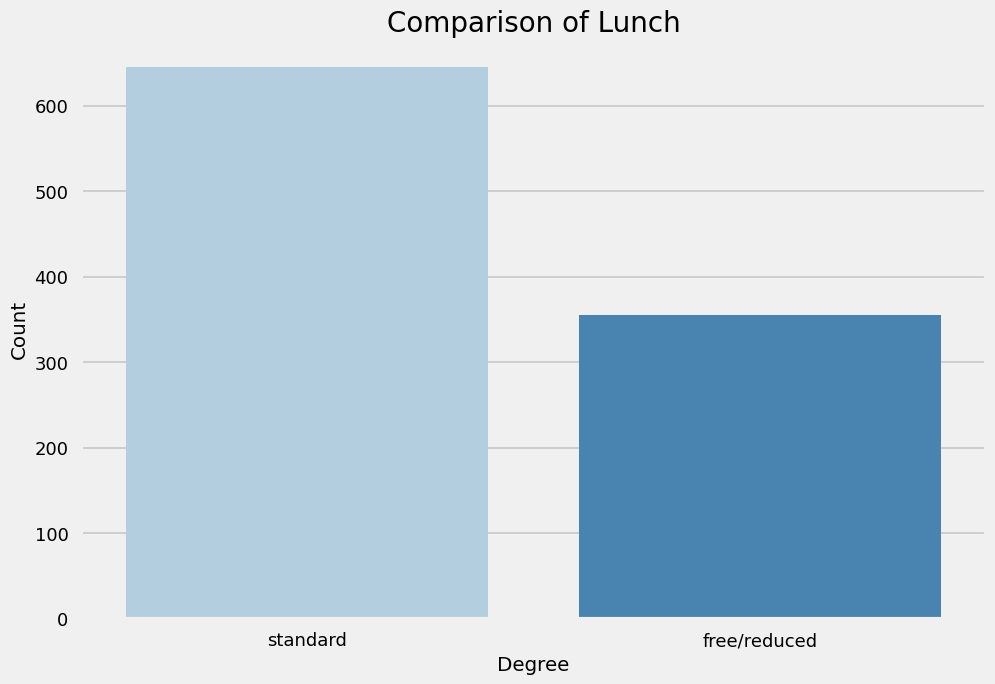

In [ ]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('seaborn-talk')
sns.countplot(x=df['lunch'],palette='Blues')
plt.title('Comparison of Lunch',fontweight=30,fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

Insights


* Students served with standard lunch was more than free lunch



### BIVARATE ANALYSIS OF LUNCH(Does lunch affect student perfromance?)

<Axes: xlabel='lunch', ylabel='writing_score'>

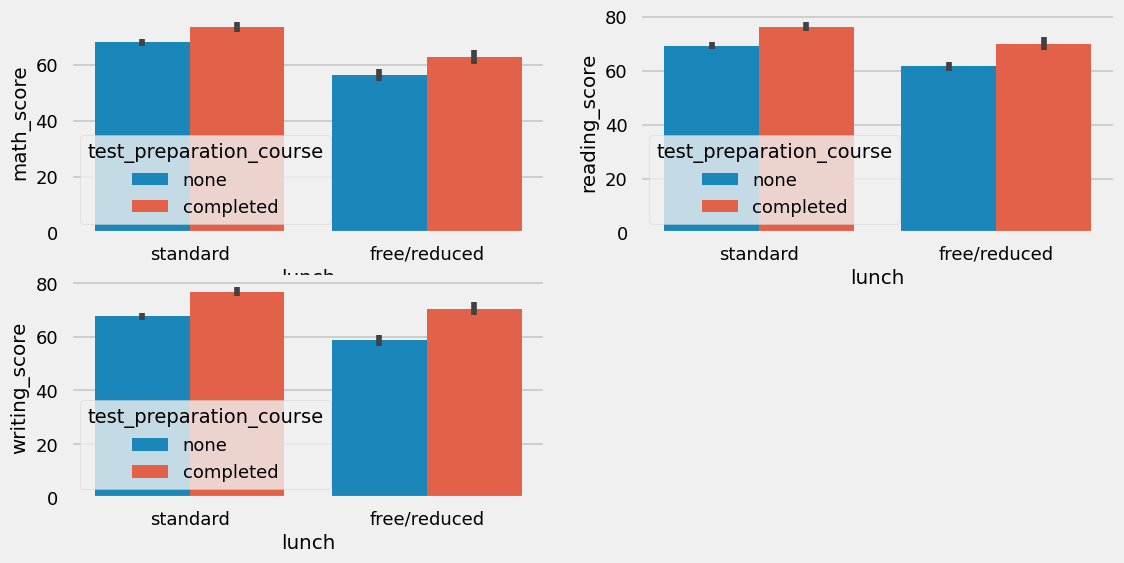

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

Insights


* Students with standard lunch perform best 



### 4.4.5)TEST STUDENT PREPARATION COLUM

* Does the test preparation affect the student performance?



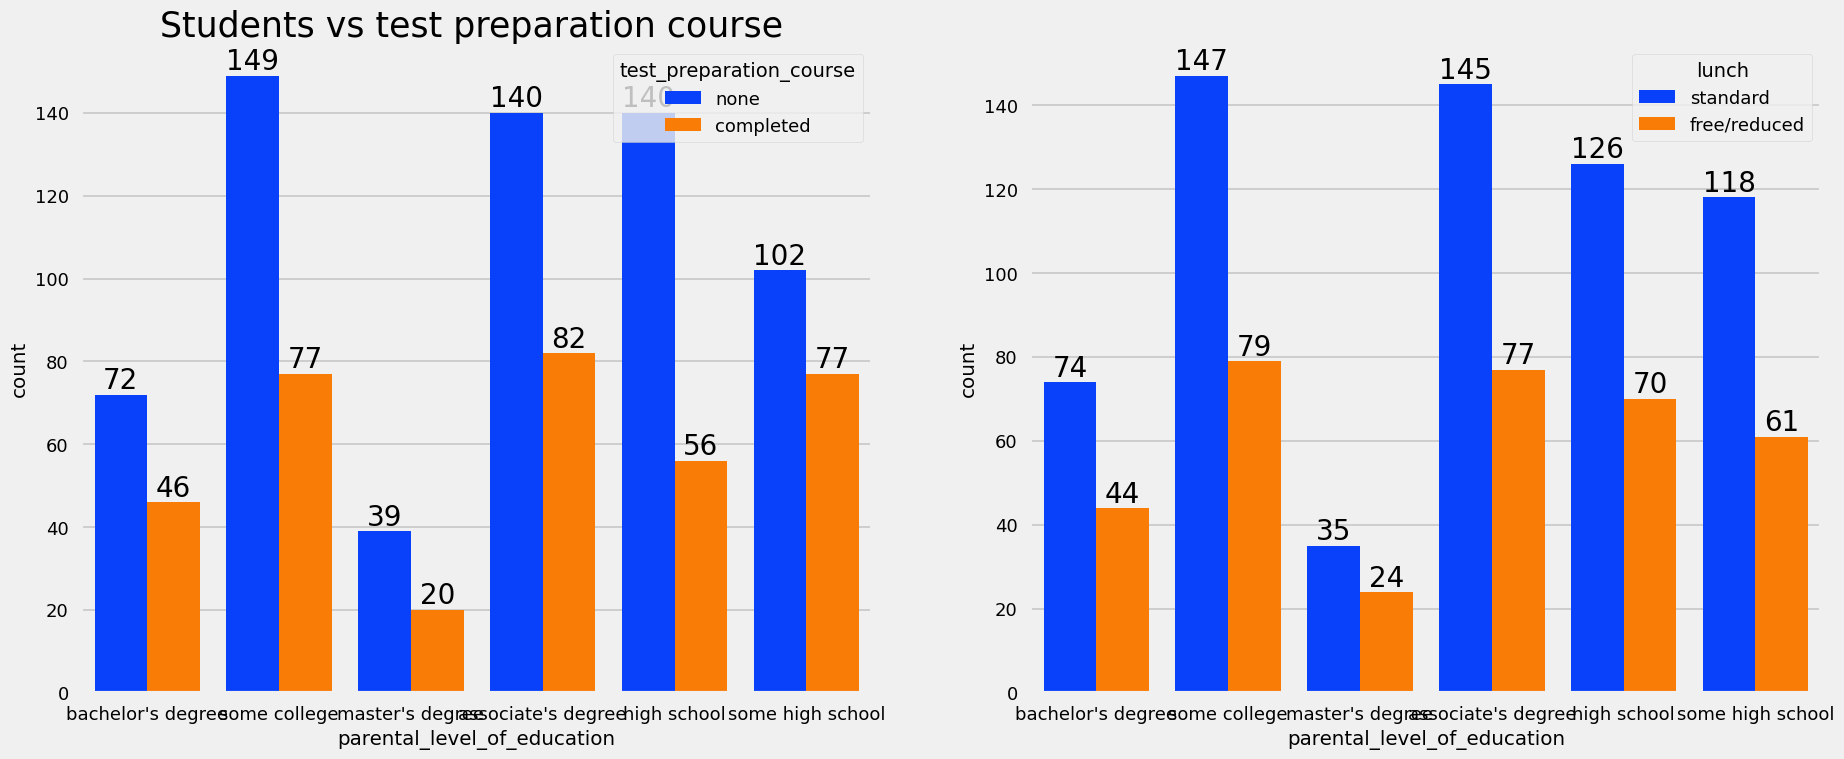

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

### 4.4.6)CHECKING THE OUTLIERS

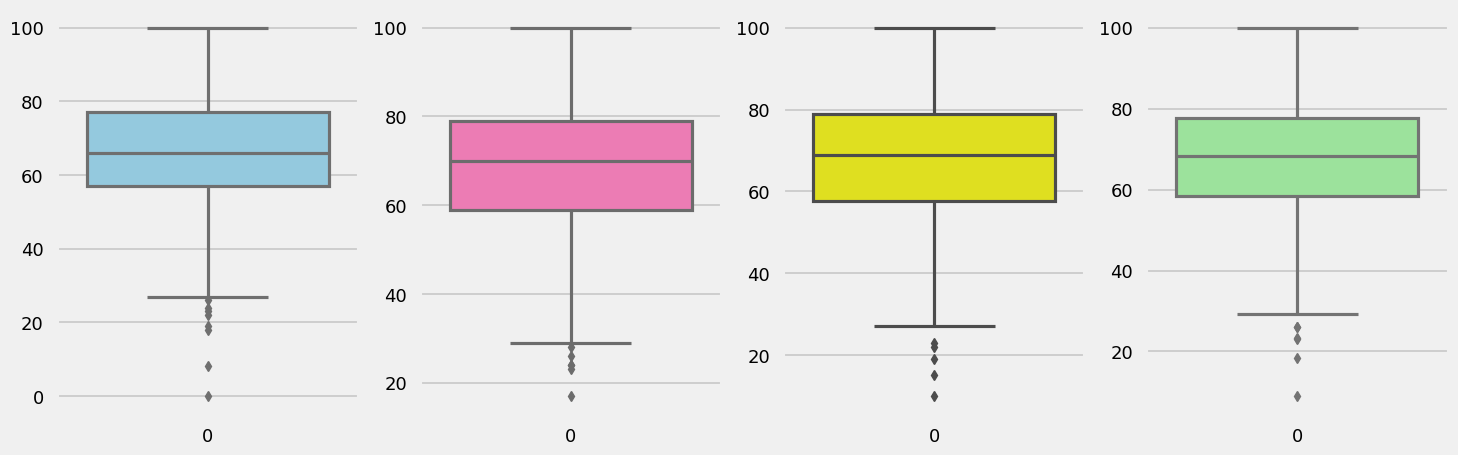

In [ ]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['avarage'],color='lightgreen')
plt.show()

### 4.4.7)MUTIVARIATE ANALYSIS USING PAIRPLOT

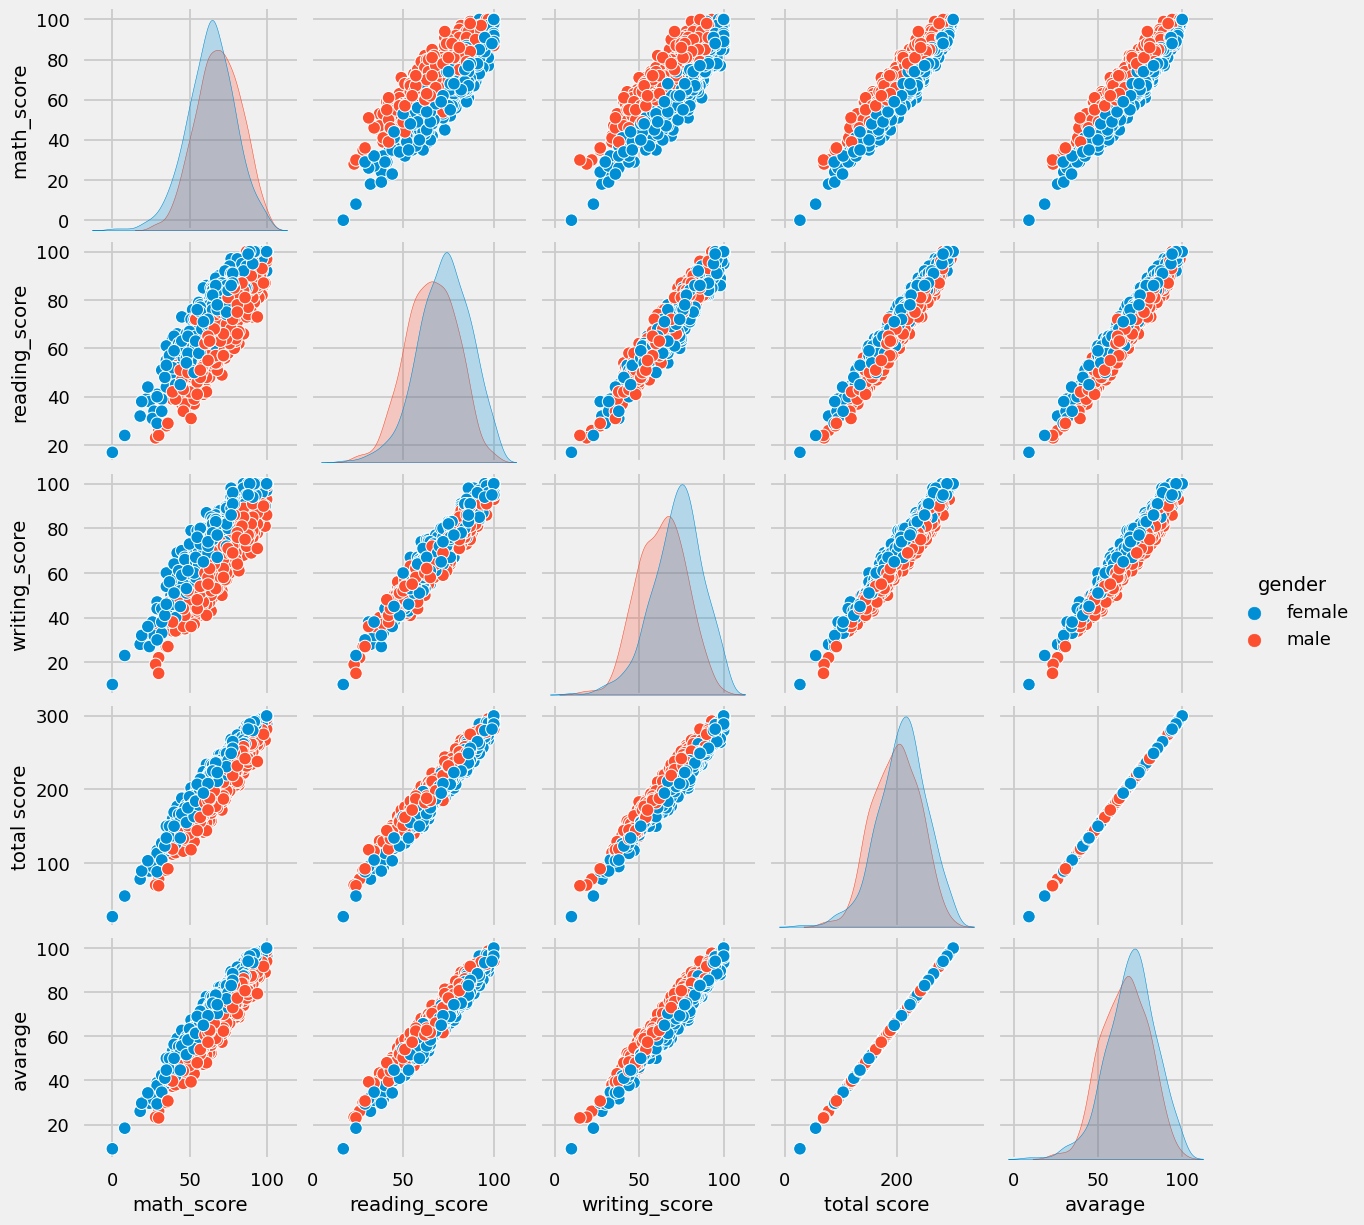

In [ ]:
sns.pairplot(df,hue = 'gender')
plt.show()


Insights
* From the above plot it is clear that all the scores increase linearly with each other.





### 5) CONCLUSIONS
* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is benefitial.
